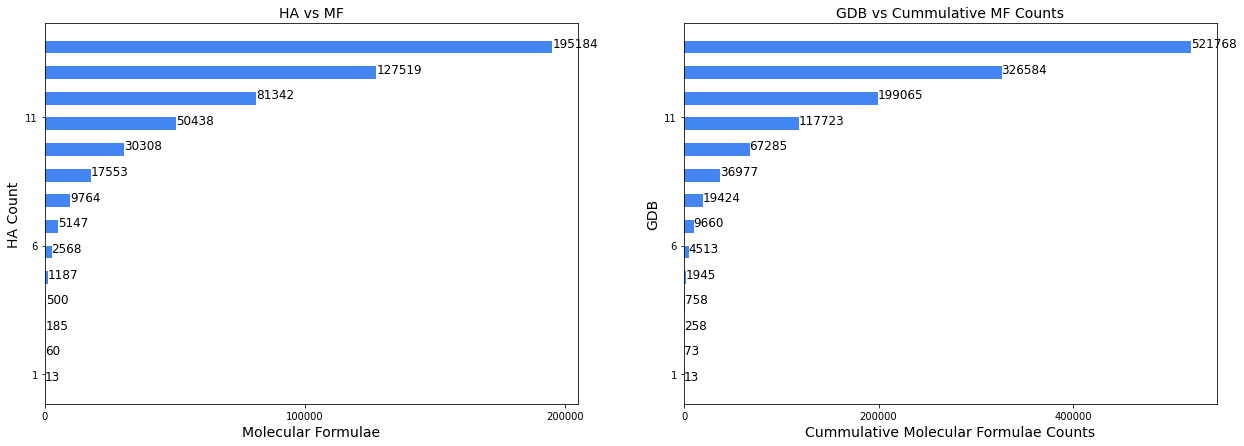

In [1]:
import csv
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


def barplot(X, Y, title, xlabel, ylabel, ax):
    width = 0.5  # the width of the bars
    ind = np.arange(len(Y))  # the x locations for the groups

    for i, v in enumerate(Y):
        ax.text(v, i, str(v), color="black", fontweight="light", fontsize="large")

    ax.barh(ind, Y, width, color="#4285F3")
    ax.set_yticks(ind + width / 2)
    ax.set_yticklabels(X, minor=False)

    fontsize = 14
    ax.locator_params(nbins=3)
    ax.set_xlabel(xlabel, fontsize=fontsize)
    ax.set_ylabel(ylabel, fontsize=fontsize)
    ax.set_title(title, fontsize=fontsize)
    # plt.savefig(os.path.join('test.svg'), dpi=300, format='svg', bbox_inches='tight') # use format='svg' or 'pdf' for vectorial pictures


def readCSV(path):
    with open(path, "r") as read_obj:
        csv_reader = csv.reader(read_obj)
        data = list(csv_reader)
    return data


def plotStructures(file, max=13):
    runData = readCSV(file)
    runDataDic = {}
    for row in runData:
        runDataDic[row[0]] = row

    cummulativeStructuresCount = {}
    cummulativeFileSize = {}
    cummulativeSurgeRunTime = {}
    cummulativeRunTime = {}
    for key in MFCummulativeDictionary.keys():
        if int(key) <= max:
            cummulativeStructuresCount[key] = 0
            cummulativeFileSize[key] = 0
            cummulativeSurgeRunTime[key] = 0
            cummulativeRunTime[key] = 0
            for mf in MFCummulativeDictionary[key]:
                if mf in runDataDic and str(runDataDic[mf][2]) != "None":
                    cummulativeStructuresCount[key] += int(runDataDic[mf][1])
                    cummulativeFileSize[key] += int(runDataDic[mf][3])
                    cummulativeSurgeRunTime[key] += float(runDataDic[mf][5])
                    cummulativeRunTime[key] += float(runDataDic[mf][4])

    # print(cummulativeStructuresCount)
    # print(cummulativeFileSize)
    # print(cummulativeSurgeRunTime)

    fig, ((ax1, ax5), (ax8, ax4), (ax6, ax2), (ax7, ax3)) = plt.subplots(
        nrows=4, ncols=2, figsize=(20, 20)
    )

    barplot(
        cummulativeStructuresCount.keys(),
        cummulativeStructuresCount.values(),
        "HA vs Cummulative Structures Count",
        "Cummulative Structures Count",
        "HA Count",
        ax1,
    )
    barplot(
        cummulativeFileSize.keys(),
        cummulativeFileSize.values(),
        "HA vs Cummulative File Size",
        " Cummulative File Size",
        "HA Count",
        ax2,
    )
    barplot(
        cummulativeSurgeRunTime.keys(),
        cummulativeSurgeRunTime.values(),
        "HA vs Cummulative Surge Run time",
        " Cummulative Surge RT",
        "HA Count",
        ax3,
    )
    barplot(
        cummulativeRunTime.keys(),
        cummulativeRunTime.values(),
        "HA vs Cummulative Total Run time",
        " Cummulative Total RT",
        "HA Count",
        ax4,
    )

    structuresCount = {}
    fileSize = {}
    surgeRT = {}
    totalRT = {}
    for key in MFDictionary.keys():
        if int(key) <= max:
            structuresCount[key] = 0
            fileSize[key] = 0
            surgeRT[key] = 0
            totalRT[key] = 0
            for mf in MFDictionary[key]:
                if mf in runDataDic and str(runDataDic[mf][2]) != "None":
                    structuresCount[key] += int(runDataDic[mf][1])
                    fileSize[key] += int(runDataDic[mf][3])
                    surgeRT[key] += float(runDataDic[mf][5])
                    totalRT[key] += float(runDataDic[mf][4])

    barplot(
        structuresCount.keys(),
        structuresCount.values(),
        "HA vs Structures Count",
        "Structures Count",
        "HA Count",
        ax5,
    )
    barplot(
        fileSize.keys(),
        fileSize.values(),
        "HA vs File Size",
        "File Size",
        "HA Count",
        ax6,
    )
    barplot(
        surgeRT.keys(), surgeRT.values(), "HA vs Surge RT", "Surge RT", "HA Count", ax7
    )
    barplot(
        totalRT.keys(), totalRT.values(), "HA vs Total RT", "Total RT", "HA Count", ax8
    )

    plt.tight_layout(pad=2.4, w_pad=2.5, h_pad=2.0)


inputFile = "/Users/chandu-jena/Development/nfdi4chem/surge/parallel-surge/resources/14HAComplete.txt"

MFDictionary = {}
MFCummulativeDictionary = {}
HACounts = []
data = readCSV(inputFile)
dataSourceDict = {}
for row in data:
    HACount = row[1].strip()
    MF = row[0].strip()
    dataSourceDict[MF] = row
    if HACount in MFDictionary:
        MFDictionary[HACount].append(MF)
    else:
        MFDictionary[HACount] = [MF]

MFCounts = []
for key in MFDictionary.keys():
    MFCounts.append(len(MFDictionary[key]))

X = MFDictionary.keys()
Y = MFCounts

fig, ((ax1, ax2)) = plt.subplots(nrows=1, ncols=2, figsize=(21, 7))
barplot(X, Y, "HA vs MF", "Molecular Formulae", "HA Count", ax1)

MFCummulativeDictionary = MFDictionary.copy()

for key in MFDictionary.keys():
    for i in range(int(key) + 1, 15):
        MFCummulativeDictionary[str(i)] = [
            *MFCummulativeDictionary[str(i)],
            *MFDictionary[key],
        ]

MFCummulativeCounts = []
for key in MFCummulativeDictionary.keys():
    MFCummulativeCounts.append(len(MFCummulativeDictionary[key]))

barplot(
    X,
    MFCummulativeCounts,
    "GDB vs Cummulative MF Counts",
    "Cummulative Molecular Formulae Counts",
    "GDB",
    ax2,
)

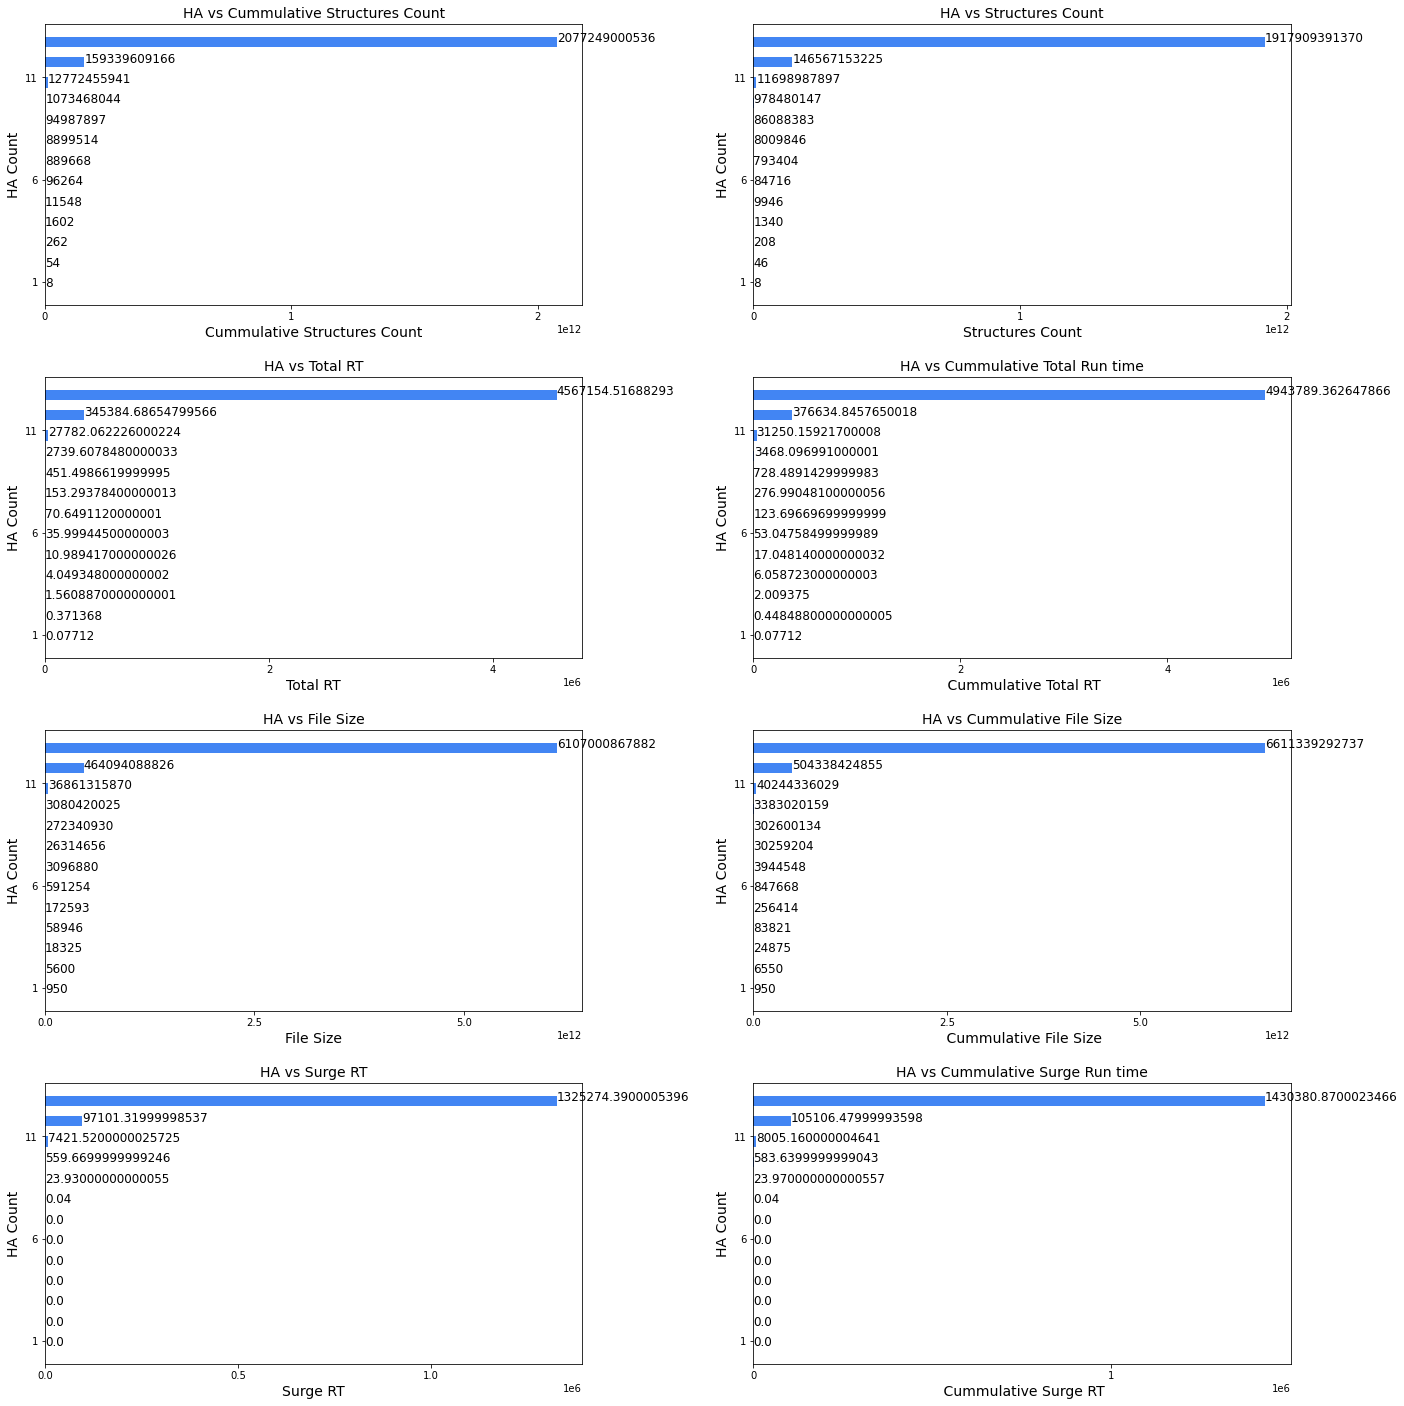

In [2]:
# 13HA analysis
HA13WithFiltersOutput = "/Users/chandu-jena/Development/nfdi4chem/surge/parallel-surge/output/13HA_with_filters_applied_175d8819.csv"

plotStructures(HA13WithFiltersOutput)

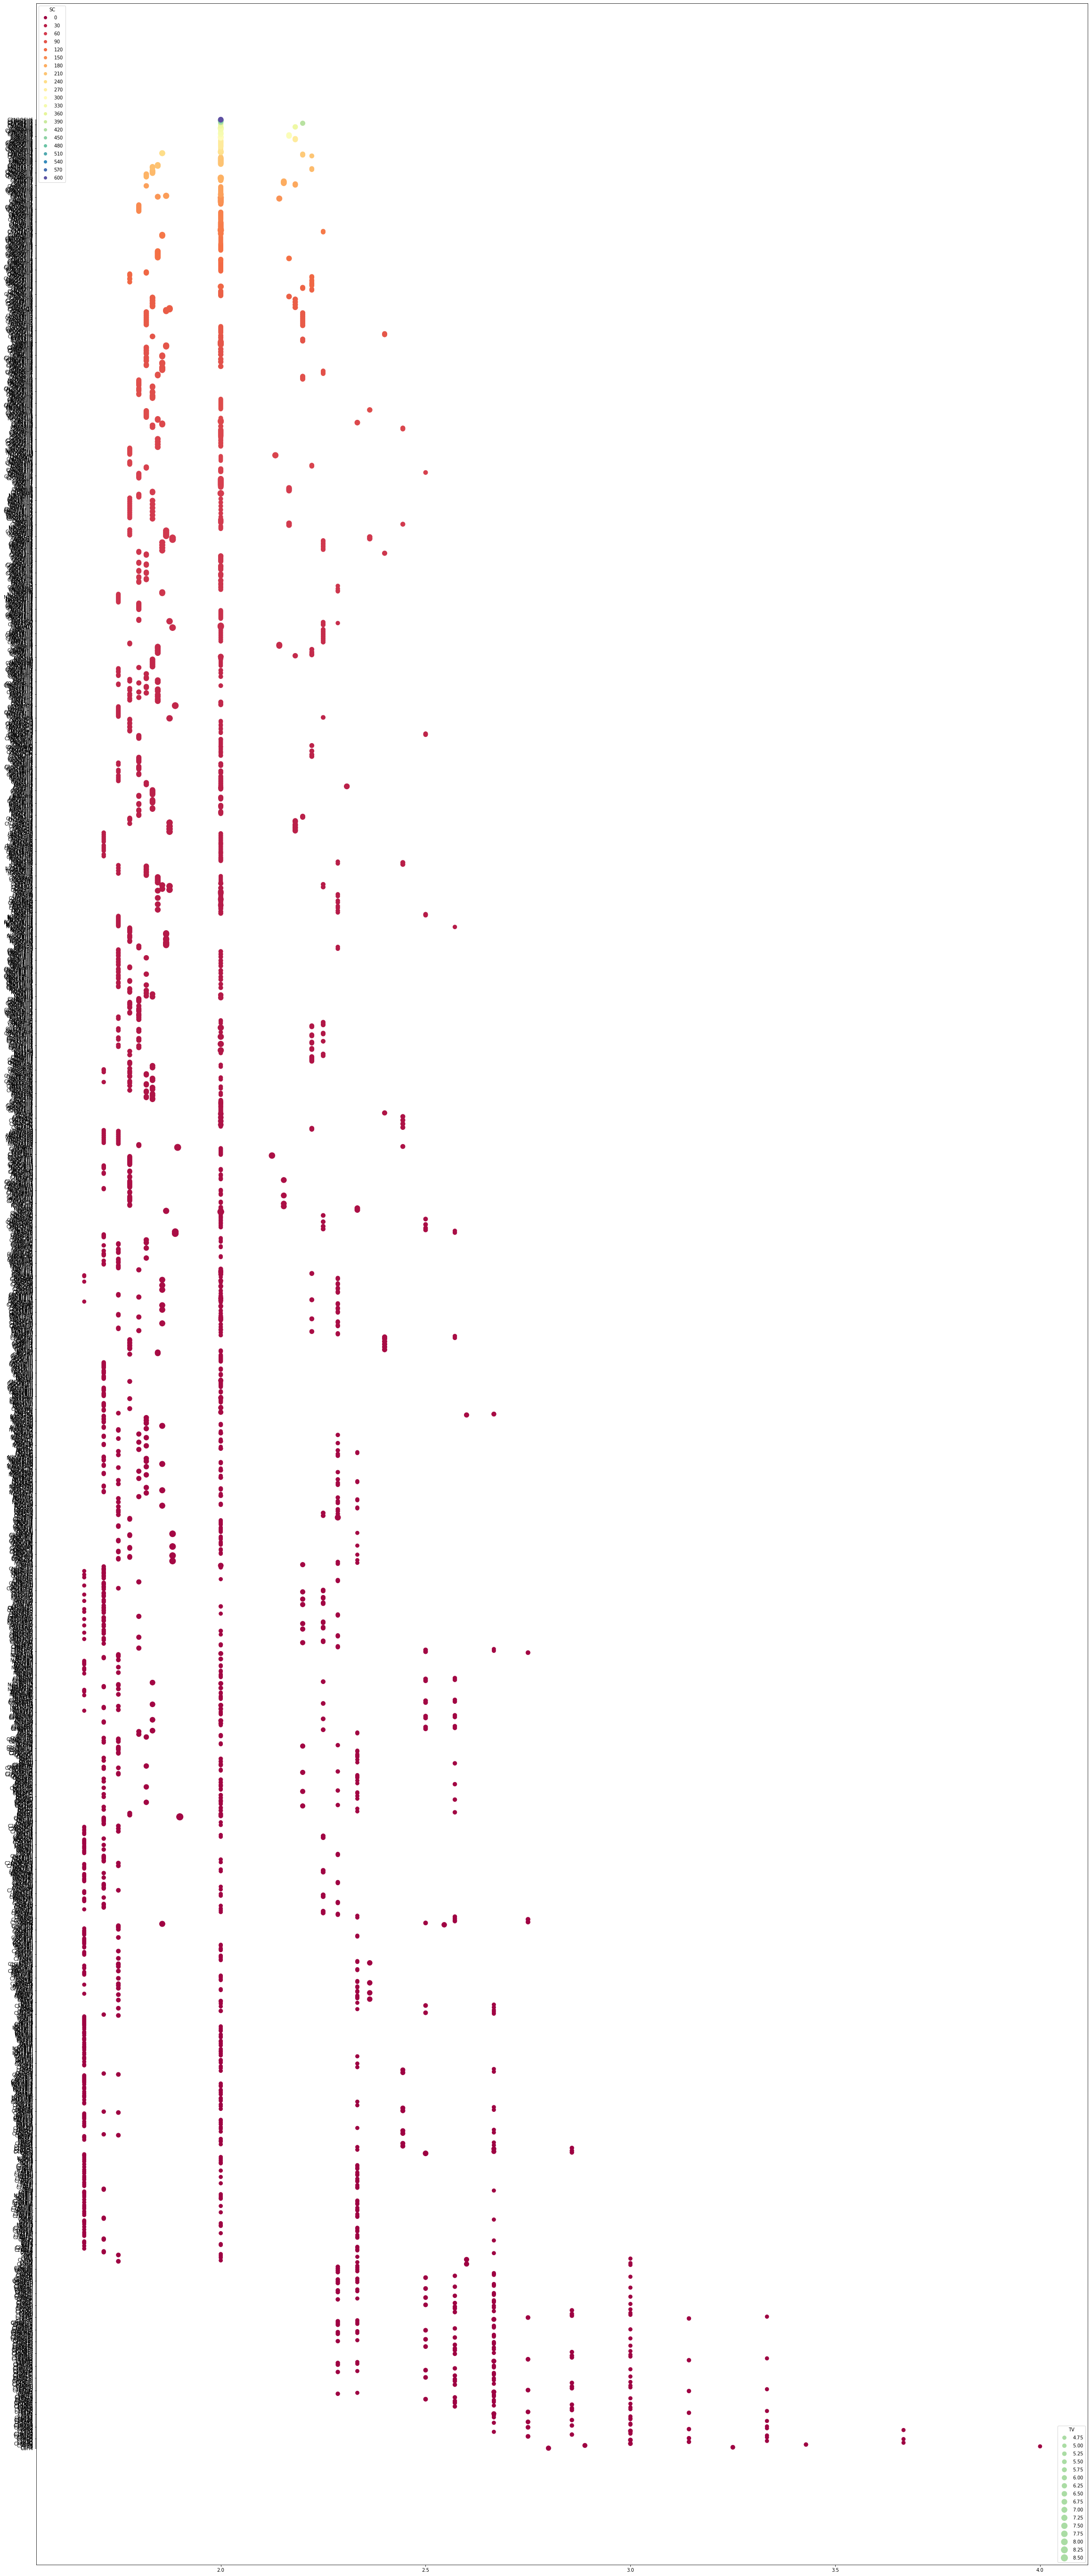

In [3]:
TenHA = MFDictionary["6"]

runData = readCSV(HA13WithFiltersOutput)
runDataDic = {}
runDataDic10HA = {}
for row in runData:
    runDataDic[row[0]] = row
    if row[0] in TenHA:
        runDataDic10HA[row[0]] = row[1]

sortedTenHA = TenHA.copy()
sortedTenHA = sorted(runDataDic10HA, key=lambda x: int(runDataDic10HA[x]))

# print(len(sortedTenHA))

MF = []
SC = []
TV = []
AC = []

for mf in sortedTenHA:
    MF.append(mf)
    SC.append(int(runDataDic[mf][1]))
    TV.append(
        int(dataSourceDict[mf][2]) / sum(list(map(int, dataSourceDict[mf][3:12])))
    )
    AC.append(sum(list(map(int, dataSourceDict[mf][3:12]))) * 10)

fig, ax = plt.subplots(figsize=(40, 100))

# Because the price is much too small when being provided as size for ``s``,
# we normalize it to some useful point sizes, s=0.3*(price*3)**2
scatter = ax.scatter(TV, MF, c=SC, s=AC, cmap="Spectral")

# Produce a legend for the ranking (colors). Even though there are 40 different
# rankings, we only want to show 5 of them in the legend.
legend1 = ax.legend(*scatter.legend_elements(num=15), loc="upper left", title="SC")
ax.add_artist(legend1)

# Produce a legend for the price (sizes). Because we want to show the prices
# in dollars, we use the *func* argument to supply the inverse of the function
# used to calculate the sizes from above. The *fmt* ensures to show the price
# in dollars. Note how we target at 5 elements here, but obtain only 4 in the
# created legend due to the automatic round prices that are chosen for us.
kw = dict(
    prop="sizes", num=15, color=scatter.cmap(0.7), func=lambda s: np.sqrt(s / 0.3) / 3
)
legend2 = ax.legend(*scatter.legend_elements(**kw), loc="lower right", title="TV")

plt.show()

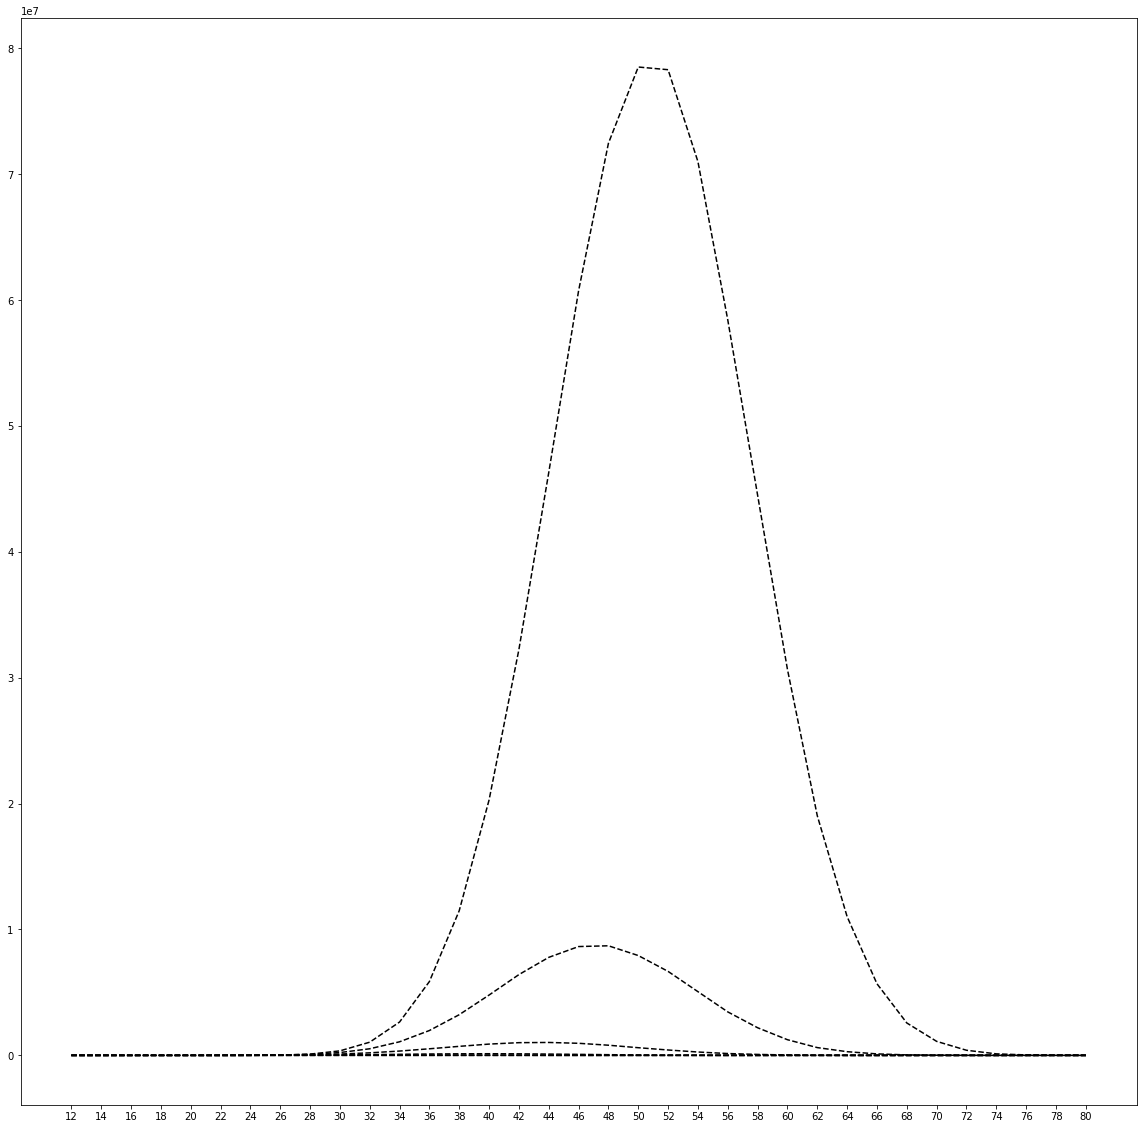

In [4]:
# HA13 = MFDictionary['13']

# runData = readCSV(HA13WithFiltersOutput)
# runDataDic = {}
# runDataDic13HA = {}
# for row in runData:
#     runDataDic[row[0]] = row
#     if row[0] in HA13:
#         runDataDic13HA[row[0]] = row

# ValencySumDic = {}

# for row in data:
#     if row[0] in HA13:
#         valencySum = row[2].strip()
#         if valencySum in ValencySumDic.keys():
#             ValencySumDic[valencySum].append(row[0])
#         else:
#             ValencySumDic[valencySum] = [row[0]]

# ValencySumFinalParameters = {}
# # print(ValencySumDic.keys())

# for key in ValencySumDic.keys():
#     for mf in ValencySumDic[key]:
#         if key not in ValencySumFinalParameters:
#             ValencySumFinalParameters[key] = {}
#             ValencySumFinalParameters[key]['sc'] = 0
#         ValencySumFinalParameters[key]['sc'] += int(runDataDic13HA[mf][1])
#     ValencySumFinalParameters[key]['sc'] = ValencySumFinalParameters[key]['sc'] / len(ValencySumDic[key])

# # print(ValencySumFinalParameters)

VSFP7 = {
    "44": {"sc": 9.0},
    "42": {"sc": 36.0},
    "40": {"sc": 76.8},
    "38": {"sc": 127.08333333333333},
    "36": {"sc": 220.54545454545453},
    "34": {"sc": 316.55},
    "32": {"sc": 386.94444444444446},
    "30": {"sc": 448.76724137931035},
    "28": {"sc": 452.5},
    "26": {"sc": 401.2464788732394},
    "24": {"sc": 328.66172839506174},
    "22": {"sc": 236.27697841726618},
    "20": {"sc": 151.19467787114846},
    "18": {"sc": 87.4829268292683},
    "16": {"sc": 44.04659498207885},
    "14": {"sc": 18.69830028328612},
    "12": {"sc": 6.830188679245283},
}
VSFP8 = {
    "50": {"sc": 18.0},
    "48": {"sc": 85.5},
    "46": {"sc": 211.2},
    "44": {"sc": 399.3333333333333},
    "42": {"sc": 782.8181818181819},
    "40": {"sc": 1271.85},
    "38": {"sc": 1757.263888888889},
    "36": {"sc": 2316.387931034483},
    "34": {"sc": 2657.2216216216216},
    "32": {"sc": 2693.4740484429067},
    "30": {"sc": 2511.9317647058824},
    "28": {"sc": 2087.3811881188117},
    "26": {"sc": 1533.2622169249107},
    "24": {"sc": 1026.845513413506},
    "22": {"sc": 607.9809451219512},
    "20": {"sc": 314.26526458616013},
    "18": {"sc": 142.65676795580112},
    "16": {"sc": 54.548801369863014},
    "14": {"sc": 15.53223388305847},
}
VSFP9 = {
    "56": {"sc": 35.0},
    "54": {"sc": 205.5},
    "52": {"sc": 584.8},
    "50": {"sc": 1253.0},
    "48": {"sc": 2765.681818181818},
    "46": {"sc": 5039.8},
    "44": {"sc": 7808.833333333333},
    "42": {"sc": 11561.189655172413},
    "40": {"sc": 14955.32972972973},
    "38": {"sc": 17135.172413793105},
    "36": {"sc": 18138.72558139535},
    "34": {"sc": 17103.40734824281},
    "32": {"sc": 14434.730033745782},
    "30": {"sc": 11080.670812603648},
    "28": {"sc": 7608.8546954314725},
    "26": {"sc": 4644.327411167513},
    "24": {"sc": 2532.025250326513},
    "22": {"sc": 1204.3554119547657},
    "20": {"sc": 490.7782444351113},
    "18": {"sc": 164.63874345549738},
    "16": {"sc": 42.20821394460363},
}
VSFP10 = {
    "62": {"sc": 75.0},
    "60": {"sc": 508.0},
    "58": {"sc": 1636.8},
    "56": {"sc": 3944.8333333333335},
    "54": {"sc": 9724.227272727272},
    "52": {"sc": 19756.05},
    "50": {"sc": 34078.694444444445},
    "48": {"sc": 56213.93103448276},
    "46": {"sc": 81167.37837837837},
    "44": {"sc": 104185.46206896551},
    "42": {"sc": 123909.31322505801},
    "40": {"sc": 131810.36925515055},
    "38": {"sc": 125656.18701870186},
    "36": {"sc": 109989.74840764332},
    "34": {"sc": 86201.91181657849},
    "32": {"sc": 60732.68545861298},
    "30": {"sc": 38721.97859436318},
    "28": {"sc": 21919.110353010976},
    "26": {"sc": 10926.640677966101},
    "24": {"sc": 4790.796495619525},
    "22": {"sc": 1765.9031573361635},
    "20": {"sc": 527.9479305740988},
    "18": {"sc": 119.5107296137339},
}
VSFP11 = {
    "68": {"sc": 159.0},
    "66": {"sc": 1263.5},
    "64": {"sc": 4601.6},
    "62": {"sc": 12393.5},
    "60": {"sc": 33977.818181818184},
    "58": {"sc": 76558.725},
    "56": {"sc": 146274.08333333334},
    "54": {"sc": 267185.8362068966},
    "52": {"sc": 427606.7135135135},
    "50": {"sc": 609553.3172413793},
    "48": {"sc": 807675.0556844547},
    "46": {"sc": 960034.9651898735},
    "44": {"sc": 1026632.4026258206},
    "42": {"sc": 1009879.6724137932},
    "40": {"sc": 896633.8749286123},
    "38": {"sc": 717186.3550847458},
    "36": {"sc": 523784.3598435463},
    "34": {"sc": 343808.2059278351},
    "32": {"sc": 201644.6453378236},
    "30": {"sc": 105992.56039783002},
    "28": {"sc": 49083.44716516023},
    "26": {"sc": 19541.966634738186},
    "24": {"sc": 6613.143551466759},
    "22": {"sc": 1797.8752783964364},
    "20": {"sc": 353.2512},
}
VSFP12 = {
    "74": {"sc": 355.0},
    "72": {"sc": 3201.0},
    "70": {"sc": 13007.2},
    "68": {"sc": 38894.25},
    "66": {"sc": 117956.27272727272},
    "64": {"sc": 293438.75},
    "62": {"sc": 618172.3055555555},
    "60": {"sc": 1244500.853448276},
    "58": {"sc": 2195684.0108108106},
    "56": {"sc": 3454136.744827586},
    "54": {"sc": 5060311.568445476},
    "52": {"sc": 6669213.030063291},
    "50": {"sc": 7930142.33442623},
    "48": {"sc": 8704620.914910227},
    "46": {"sc": 8643376.83738001},
    "44": {"sc": 7784538.920746888},
    "42": {"sc": 6416030.0930159725},
    "40": {"sc": 4791298.195174909},
    "38": {"sc": 3230824.7496673637},
    "36": {"sc": 1973547.1195786865},
    "34": {"sc": 1078937.4996086615},
    "32": {"sc": 524407.9091221637},
    "30": {"sc": 224238.21042553193},
    "28": {"sc": 82716.35920271417},
    "26": {"sc": 25493.17912881435},
    "24": {"sc": 6281.970774329618},
    "22": {"sc": 1118.7854406130268},
}
VSFP13 = {
    "80": {"sc": 802.0},
    "78": {"sc": 8168.0},
    "76": {"sc": 36858.0},
    "74": {"sc": 121717.83333333333},
    "72": {"sc": 406585.3181818182},
    "70": {"sc": 1112206.85},
    "68": {"sc": 2573684.111111111},
    "66": {"sc": 5688037.129310345},
    "64": {"sc": 11016081.275675675},
    "62": {"sc": 19032062.57586207},
    "60": {"sc": 30653494.322505802},
    "58": {"sc": 44493408.95727848},
    "56": {"sc": 58414739.836065575},
    "54": {"sc": 70984889.99375975},
    "52": {"sc": 78286720.43186937},
    "50": {"sc": 78500398.71728395},
    "48": {"sc": 72439402.01264262},
    "46": {"sc": 60724133.66955504},
    "44": {"sc": 46285486.11111111},
    "42": {"sc": 32230450.38774045},
    "40": {"sc": 20279476.176032577},
    "38": {"sc": 11489257.405983733},
    "36": {"sc": 5861814.247843925},
    "34": {"sc": 2646845.9385806643},
    "32": {"sc": 1047280.5197527355},
    "30": {"sc": 357539.3721316207},
    "28": {"sc": 101416.41241756474},
    "26": {"sc": 22717.56662489557},
    "24": {"sc": 3710.2397458116698},
}


x1 = list(VSFP7.keys())
x2 = list(VSFP8.keys())
x3 = list(VSFP9.keys())
x4 = list(VSFP10.keys())
x5 = list(VSFP11.keys())
x6 = list(VSFP12.keys())
x7 = list(VSFP13.keys())

x = sorted(set(x1 + x2 + x3 + x4 + x5 + x6 + x7))


def getDictionaryValues(x, y):
    valDic = {}
    for val in x:
        if val in y.keys():
            valDic[val] = y[val]["sc"]
        else:
            valDic[val] = 0
    return valDic.values()


y1 = getDictionaryValues(x, VSFP7)
y2 = getDictionaryValues(x, VSFP8)
y3 = getDictionaryValues(x, VSFP9)
y4 = getDictionaryValues(x, VSFP10)
y5 = getDictionaryValues(x, VSFP11)
y6 = getDictionaryValues(x, VSFP12)
y7 = getDictionaryValues(x, VSFP13)

plt.figure(figsize=(20, 20))
plt.plot(x, y1, color="black", linestyle="dashed")
plt.plot(x, y2, color="black", linestyle="dashed")
plt.plot(x, y3, color="black", linestyle="dashed")
plt.plot(x, y4, color="black", linestyle="dashed")
plt.plot(x, y5, color="black", linestyle="dashed")
plt.plot(x, y6, color="black", linestyle="dashed")
plt.plot(x, y7, color="black", linestyle="dashed")
# plt.yscale('log')

plt.show()